# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Import API key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []

lat = []
lon = []

cities = []

temp = []
clouds = []
wind = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
print(cities)

['mbandaka', 'tuktoyaktuk', 'lorengau', 'hobart', 'deep river', 'bowling green', 'punta arenas', 'vaini', 'bandarbeyla', 'new norfolk', 'ushuaia', 'grand gaube', 'mar del plata', 'port lincoln', 'tiksi', 'cape town', 'albany', 'cabedelo', 'georgetown', 'luderitz', 'san cristobal', 'cockburn town', 'saint-philippe', 'sioux lookout', 'krasnozerskoye', 'hithadhoo', 'kamenskoye', 'homer', 'yellowknife', 'rikitea', 'mataura', 'kapaa', 'dicabisagan', 'nemuro', 'dingle', 'samusu', 'katsuura', 'lavrentiya', 'bethel', 'ancud', 'bredasdorp', 'port alfred', 'lebu', 'okha', 'butaritari', 'saryshagan', 'nicoya', 'attawapiskat', 'nagato', 'kashi', 'hilo', 'salalah', 'debre tabor', 'santa eulalia del rio', 'alexandria', 'qaanaaq', 'chokurdakh', 'koumac', 'lagoa', 'san jose', 'jaciara', 'tasiilaq', 'college', 'omboue', 'kieta', 'hamilton', 'upernavik', 'hermanus', 'puerto ayora', 'rocha', 'weiden', 'altamira', 'weligama', 'busselton', 'sola', 'beloha', 'quelimane', 'mayo', 'adrar', 'kodiak', 'batagay'

In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=6a9ded0210a28a26ae802e071f505b96&q=airai


In [5]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(weather_json)

{'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 292.4, 'feels_like': 293.18, 'temp_min': 292.4, 'temp_max': 292.4, 'pressure': 1011, 'humidity': 69, 'sea_level': 1011, 'grnd_level': 857}, 'wind': {'speed': 0.42, 'deg': 352}, 'rain': {'3h': 2.28}, 'clouds': {'all': 97}, 'dt': 1586662953, 'sys': {'country': 'TL', 'sunrise': 1586641262, 'sunset': 1586684207}, 'timezone': 32400, 'id': 1651810, 'name': 'Airai', 'cod': 200}


In [6]:
response = requests.get(query_url + city).json()
print(response)

{'cod': '404', 'message': 'city not found'}


In [7]:
# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 292.4, 'feels_like': 293.18, 'temp_min': 292.4, 'temp_max': 292.4, 'pressure': 1011, 'humidity': 69, 'sea_level': 1011, 'grnd_level': 857}, 'wind': {'speed': 0.42, 'deg': 352}, 'rain': {'3h': 2.28}, 'clouds': {'all': 97}, 'dt': 1586662953, 'sys': {'country': 'TL', 'sunrise': 1586641262, 'sunset': 1586684207}, 'timezone': 32400, 'id': 1651810, 'name': 'Airai', 'cod': 200}.


In [8]:
# Create cities dataframe
cities_df = pd.read_csv('../output_data/cities.csv')
cities_df.dropna(inplace = True) 
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [9]:
weather_df=cities_df.loc[:, ['City', 'Lat', 'Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,ostrovnoy,68.05,39.51,37.50,72,2,7.16
1,mahebourg,-20.41,57.70,78.80,74,75,11.41
2,qaanaaq,77.48,-69.36,22.20,73,25,2.37
3,zhuhai,40.71,112.04,44.60,39,0,4.47
4,cape town,-33.93,18.42,55.99,76,20,8.05
...,...,...,...,...,...,...,...
543,yabrud,33.97,36.66,80.60,32,0,8.05
544,paraiso,24.01,-104.61,84.20,4,5,16.11
545,veraval,49.65,0.71,61.00,62,0,8.05
546,novyy urgal,51.07,132.56,49.74,93,100,2.68


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Create scatter plots for each:
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

# Latitude LT

# Temperature T (F)

# Humidity H (%)

# Cloudiness Cl (%) 

# Wind Speed WS(mph)

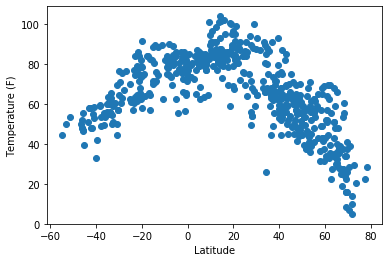

In [15]:
# Create a Scatter Plot: Temperature (F) vs. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

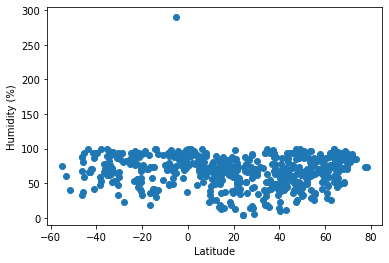

In [18]:
# Create a Scatter Plot: Humidity (%) vs. Latitude

x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

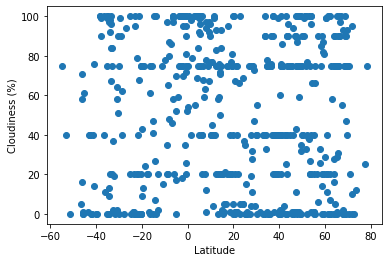

In [17]:
# Create scatter plot: Cloudiness (%) vs. Latitude

x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

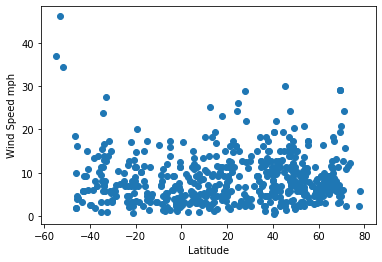

In [14]:
# Create scatter plot: Wind Speed (mph) vs. Latitude

x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
plt.show()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_df.to_csv('HW06_Export_CityData.csv') 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression